In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Starter_Code/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [ ]:
# a scaler is needed based on the difference in the column ranges

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [ ]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original DataFrame


# Set the coin_id column as index


# Display the scaled DataFrame


In [7]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df)

# predict/transform
scaled_data = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# to bring bakc the coins
df_scaled.index = df.index 

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

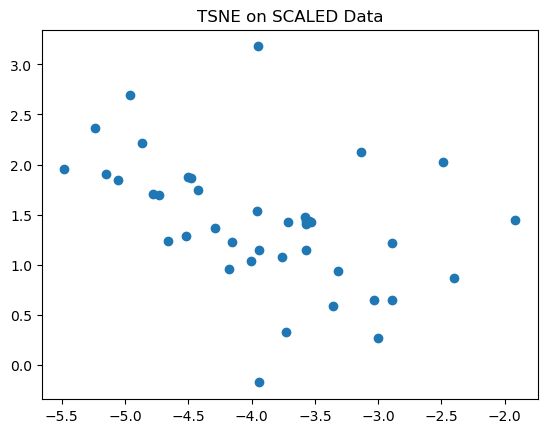

In [8]:
 # Cluster viablility check?
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [ ]:
# not advised to trust TSNE due to small sample size 

In [9]:
 # Do Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_scaled

In [15]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 11)) # NOTE THAT K=1 BREAKS THE SILHOUETTE SCORE METRIC, SO 2-11 WAS USED

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [17]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111


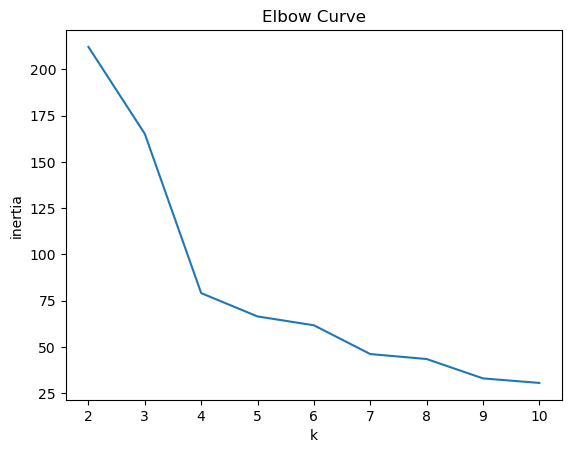

In [18]:
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [ ]:
# 4 is probably the best, highest variance ratio criterion, most steep elbow section, a good silhouette score


In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# # Create a dictionary with the data to plot the Elbow curve


# # Create a DataFrame with the data to plot the Elbow curve
# elbow_data = {"k": k, "inertia": inertia}
# df_elbow = pd.DataFrame(elbow_data)

# # Review the DataFrame
# df_elbow.head(20)

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** # 4 is probably the best due to highest variance ratio criterion, most steep elbow section, a good silhouette score. Supported by elbow curve chart as well. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [ ]:
# df_sub = df_scaled.copy()

# # Define the model with the higher value of k clusters
# # Use a random_state of 1 to generate the model

# # CHANGE THIS DEPENDING ON YOUR OPTIMAL k
# model = KMeans(n_clusters=3, random_state=1)

# # Fit the model
# model.fit(X)

# # Make predictions
# preds = model.predict(X)

# # Add a class column with the labels to the df DataFrame
# df_sub2 = df_sub.copy()
# df_sub2['clusters'] = preds

# df_sub2.head()

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)


In [20]:
# Fit the K-Means model using the scaled DataFrame
model.fit(X)


KMeans(n_clusters=3, random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
preds = model.predict(X)


# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1
 0 0 0 0]


In [26]:
# Create a copy of the scaled DataFrame
df_sub2 = df_scaled.copy()


In [27]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_sub2['clusters'] = preds


# Display the copy of the scaled DataFrame
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


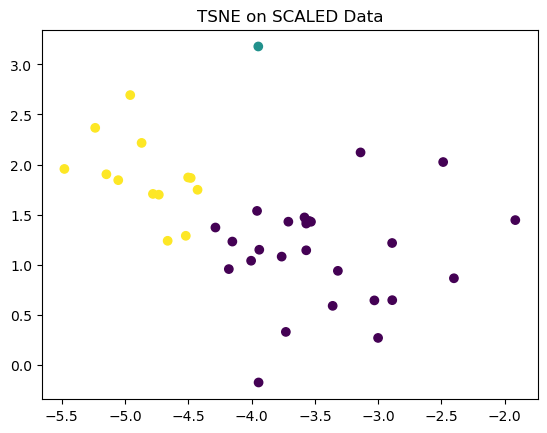

In [28]:
 # Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_sub2.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

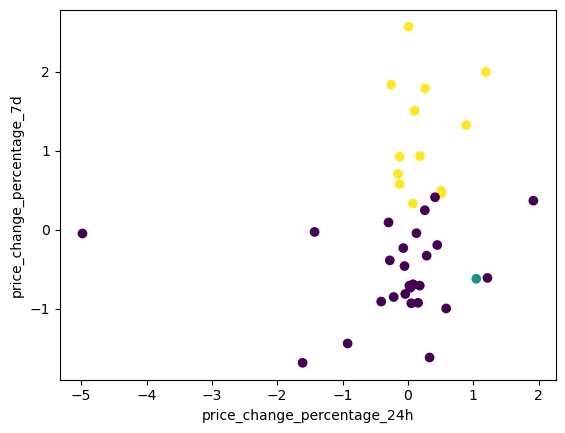

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.


In [ ]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.


# View the scaled PCA data


In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [ ]:
# Create a new DataFrame with the PCA data.


# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index


# Display the scaled PCA DataFrame


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data


In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame


# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the scaled PCA DataFrame


# Add a new column to the copy of the PCA DataFrame with the predicted clusters


# Display the copy of the scaled PCA DataFrame


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 